# Perkenalan

Nama: Ryan Risyadul Maruf

Kelas: FTDS-RMT-Batch_19

Objective: Melakukan Analisis terhadap data kredit macet dan mengambil kesimpulan terhadap data tersebut

# Ch. I — Identifikasi Masalah

## Latar belakang

Kredit macet merupakan momok terbesar bagi industri finansial, seperti di sektor perbankan, real estate, dan leasing. Menurut data dari **World Bank**, rata-rata *Non-Performing Loan Ratio* (NPL Ratio) atau rasio kredit macet untuk tahun 2021 dari total 108 negara berkisar sekitar **6,49%**. Nilai tertinggi dicapai oleh San Marino yang bernilai **58,96 persen** dan nilai terendah dicapai oleh Micronesia dengan nilai **0,27%**. Sedangkan untuk Indonesia sendiri, rasio kredit macet terbilang cukup rendah, yaitu masih di bawah rata-rata dunia, yaitu sekitar **2,6%**.

Namun, dengan adanya kenaikan penggunaan internet dan gadget yang signifikan di Indonesia, serta pola konsumsi masyarakat yang meningkat secara drastis dan pemulihan ekonomi pasca COVID-19, penggunaan layanan keuangan seperti kartu kredit dan *paylater* juga semakin meningkat. Hal ini dapat meningkatkan risiko gagal bayar jika perusahaan tidak memiliki visibilitas tentang preferensi pelanggan yang melakukan transaksi di platform atau lembaga keuangan tersebut.

Oleh sebab itu, untuk mengurangi risiko kredit, diperlukan *profiling* dan *filtering* terhadap pelanggan terlebih dahulu agar risiko gagal bayar dapat diminimalkan dengan efektif. Pada proses ini, dibutuhkan analis untuk menganalisis data yang ada, dan dari data tersebut, para stakeholder dapat menggunakan hasil analisis untuk membuat kebijakan yang berbasis data atau *data-driven decision making*.

Untuk melakukan analisis terkait dengan credit risk customer, saya akan menggunakan data sample dari **Kaggle** [Credit Risk Dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset). Dari hasil analisis tersebut, dapat dibuat kesimpulan yang dapat digunakan sebagai referensi dalam pembuatan kebijakan untuk optimalisasi pengurangan kredit macet dalam suatu perusahaan.

## Problem Statement

Mengetahui Prefensi Jenis Pelanggan yang Berpotensi Gagal Bayar Berdasarkan Katogori yang Ada

## Penjabaran Masalah 

- Pelanggan dengan kriteria yang bagaimanakah yang mempunyai rata-rata % resiko gagal paling tinggi?

- Rentang usia berapa yang mempunyai resiko gagal bayar paling tinggi?

- Untuk apa sajakah tujuan orang yang melakukan kredit?

- Apakah orang dengan jumlah kredit lain (lebih dari 1 kredit) punya preferensi untuk gagal bayar? 

- Bagaimana korelasi pelanggan yang gagal bayar dengan umur, jenis kelamin, ataupun jenis pekerjaan dan rentang waktu dalam bekerja? Manakah yang mempunyai korelasi paling besar?

- Apakah status personal seseorang (single/menikah/cerai) menentukan potensi gagal bayar, serta apakah orang yang mempunyai tanggungan lebih rentan untu mengalami gagal bayar?

- Apakah status kewarganegaraan juga berpengaruh terhadap NPL-Ratio?

# Ch. II — Data Loading

SQL Query 



```
SELECT *
FROM `hacktiv8-20230327.credit_risk.credit` 
WHERE credit_amount IS NOT NULL
```



In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Dataset
df = pd.read_csv('/content/drive/MyDrive/Hacktiv8/Project Milestone/credit.csv')

# Ch. III — Data Cleaning

In [ ]:
len(df)

1000

In [ ]:
df.shape

(1000, 21)

In [ ]:
df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,no checking,9,existing paid,furniture/equipment,1980,<100,<1,2,female div/dep/mar,co applicant,...,car,19,none,rent,2,skilled,1,none,True,bad
1,<0,12,existing paid,furniture/equipment,1282,<100,1<=X<4,2,female div/dep/mar,none,...,car,20,none,rent,1,skilled,1,none,True,bad
2,no checking,12,existing paid,used car,4675,no known savings,<1,1,female div/dep/mar,none,...,car,20,none,rent,1,skilled,1,none,True,good


In [ ]:
df.tail(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
997,0<=X<200,10,existing paid,new car,7308,<100,unemployed,2,male single,none,...,no known property,70,bank,for free,1,high qualif/self emp/mgmt,1,yes,True,good
998,0<=X<200,9,all paid,used car,5129,<100,>=7,2,female div/dep/mar,none,...,no known property,74,bank,for free,1,high qualif/self emp/mgmt,2,yes,True,bad
999,<0,24,critical/other existing credit,used car,6615,<100,unemployed,2,male single,none,...,no known property,75,none,for free,2,high qualif/self emp/mgmt,1,yes,True,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [ ]:
# Check for missing values
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

# Ch. IV — Analisis dan perhitungan

## Ch. IV.A — EDA (Exploratory Data Analysis)

### 1. Rentang Usia Nasabah

In [ ]:
age_range = df['age'].describe()[['min', 'max']]
print("Age range:", age_range)

Age range: min    19.0
max    75.0
Name: age, dtype: float64


Rentang usia nasabah yang melakukan kredit berdasarkan data berkisar **antara 19 sampai 75 tahun**

### 2. Total Kredit (USD)

In [ ]:
total_credit = df['credit_amount'].sum()
total_credit

3271258

Total kredit yang diberikan kepada pelanggan sejumlah **3,271,258 USD**

### 3. Tujuan Kredit

In [ ]:
credit_purpose = df.groupby('purpose').size()
credit_purpose_percentages = credit_purpose / credit_purpose.sum() * 100

print('Credit',credit_purpose_percentages)

Credit purpose
business                9.7
domestic appliance      1.2
education               5.0
furniture/equipment    18.1
new car                23.4
other                   1.2
radio/tv               28.0
repairs                 2.2
retraining              0.9
used car               10.3
dtype: float64


Ada 10 tujuan orang melakukan kredit yaitu sebagai berikut:

1. Business - 9.7%
2. Domestic Appliance - 1.2%
3. Education - 5.0
4. Furniture/Equipment - 18.1%
5. New Car - 23.4%
6. Other - 1.2%
7. Radio/Tv - 28.0%
8. Repairs - 2.2%
9. Retraining - 0.9%
10. Used Car - 10.3%

Pengajuan kredit tertinggi yaitu bertujuan untuk pembelian *Radio/TV* dengan persentase sebesar **28.0%** diikuti dengan *pembelian mobil baru* dengan persentase senilai **23.4%**

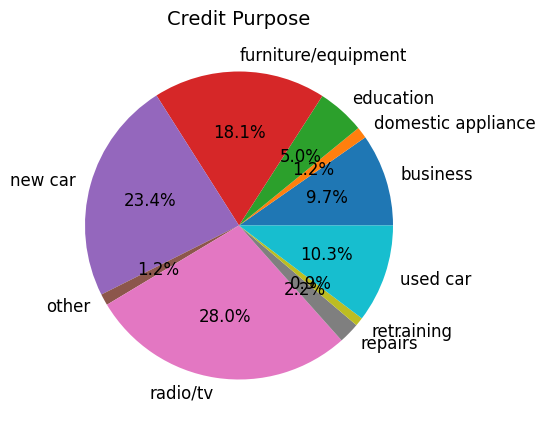

In [ ]:
# Pie Chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(credit_purpose_percentages, labels=credit_purpose.index, autopct='%1.1f%%', textprops={'fontsize': 12})
ax.set_title('Credit Purpose', fontsize=14)
plt.show()

### 4. Durasi Pengajuan Kredit

In [ ]:
credit_duration = df['duration'].describe()[['min', 'max']]
print("Credit Duration:", credit_duration)

Credit Duration: min     4.0
max    72.0
Name: duration, dtype: float64


Durasi pengajuan kredit berdasarkan data mempunyai rentang waktu sekitar 4 bulan sampai 72 bulan (6 Tahun)

### 5. Jumlah Kredit Lainnya (Mempunyai Tanggungan Kredit Lain) 

In [ ]:
other_credits = df.groupby('existing_credits').size()
other_credits_percentages = other_credits / other_credits.sum() * 100

other_credits_percentages

existing_credits
1    63.3
2    33.3
3     2.8
4     0.6
dtype: float64

Untuk nasabah yang tidak memiliki tanggungan sebesar **63.3%**, memiliki 2 kredit lain **33.3%** dan yang memilki lebih dari 3 kredit lain sebesar **3.4%** persen

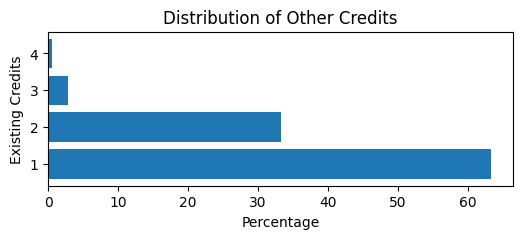

In [ ]:
# Bar Chat
fig, ax = plt.subplots(figsize=(6,2))
ax.barh(other_credits_percentages.index, other_credits_percentages)
ax.set_xlabel('Percentage')
ax.set_ylabel('Existing Credits')
ax.set_title('Distribution of Other Credits')
plt.show()

### 6. Jenis Pekerjaan

In [ ]:
job_type = df.groupby('job').size()
job_type_percentages = job_type / job_type.sum() * 100

print('Category', job_type_percentages)

Category job
high qualif/self emp/mgmt    14.8
skilled                      63.0
unemp/unskilled non res       2.2
unskilled resident           20.0
dtype: float64


Jenis pekerjaan orang yang melakukan kredit sebagai berikut:

1. High Qualification/Self Employed/Management (14.8%) 
2. Skilled (63%)
3. Unemployed/Unskilled non-Resident (2.2%) 
4. Unskilled Resident (20%)

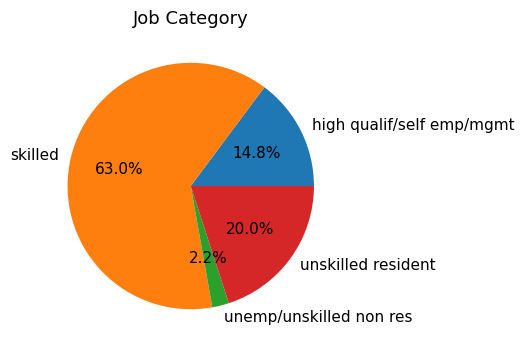

In [ ]:
# Pie Chart
fig, ax = plt.subplots(figsize=(5,4))
ax.pie(job_type_percentages, labels=job_type.index, autopct='%1.1f%%', textprops={'fontsize': 11})
ax.set_title('Job Category', fontsize=13)
plt.show()

### 7. Rentang Waktu Bekerja

In [ ]:
work_duration = df.groupby('employment').size()
work_duration_percentages = work_duration / work_duration.sum() * 100

work_duration_percentages

employment
1<=X<4        33.9
4<=X<7        17.4
<1            17.2
>=7           25.3
unemployed     6.2
dtype: float64

Persentase rentang waktu orang yang bekerja sebagai berikut:

- Tidak bekerja = 6.2%
- < 1 tahun bekerja = 17.2%
- Antara 1 - 4 tahun = 33.9% 
- Antara 4 - 5 tahun = 17.4%
- lebih dari 7 tahun bekerja = 25.3%  

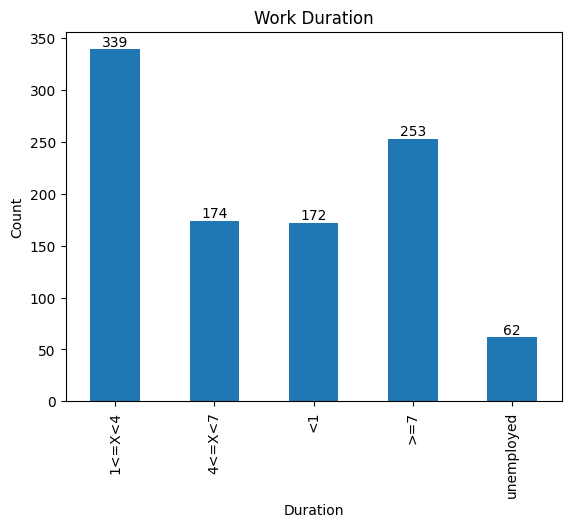

In [ ]:
# Bar Chart from total Work Duration
ax = work_duration.plot(kind='bar')
plt.title('Work Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=i.datavalues.astype(int))
plt.show()

### 8. Status Perseorangan (Laki-Laki/Perempuan — Belum Menikah/Menikah/Cerai)

In [ ]:
status = df.groupby('personal_status').size()
status_percentages = status / status.sum() * 100

status_percentages

personal_status
female div/dep/mar    31.0
male div/sep           5.0
male mar/wid           9.2
male single           54.8
dtype: float64

Berdasarkan data, persentase nasabah *laki-laki* yang mengajukan kredit dan *belum menikah* sebesar **(54.8%)**, *menikah/sudah pernah menikah* **(14.2%)** sedangkan untuk *wanita yang menikah/sudah pernah menikah* (31%)

### 9. Jumlah Orang yang Ditanggung dalam Satu Rumah

In [ ]:
depending = df.groupby('num_dependents').size()
depending

num_dependents
1    845
2    155
dtype: int64

Jumlah orang yang tidak punya tanggungan sebesar **845** dan sisanya orang yang mempunyai tanggungan lebih dari satu yaitu **155** orang

### 10. Status Kewarganegaraan (Warga Negara Asing/Bukan)

In [ ]:
foreign = df.groupby('foreign_worker').size()
foreign

foreign_worker
False     37
True     963
dtype: int64

Berdasarkan data, orang yang termasuk warga negara asing sebesar **37** dan orang yang bukan warga negara asing (lokal) sejumlah **963**

## Ch. IV.C — Statistik Deskriptif

### 1. Central Tendency (Mean, Median, Modus)

Menghitung Mean, Median, dan Modus dari 'Tujuan Kredit', 'Jumlah Kredit Lainnya', 'Jenis Pekerjaan', 'Rentang Waktu Bekerja', 'Status Perseorangan'

In [ ]:
def calculate_statistics(column):
    median = column.median()
    mean = column.mean()
    mode = column.mode()[0]
    print(f"Median: {median}")
    print(f"Mean: {mean}")
    print(f"Mode: {mode}\n")

calculate_statistics(credit_purpose)
calculate_statistics(other_credits)
calculate_statistics(job_type)
calculate_statistics(work_duration)
calculate_statistics(status)

Median: 73.5
Mean: 100.0
Mode: 12

Median: 180.5
Mean: 250.0
Mode: 6

Median: 174.0
Mean: 250.0
Mode: 22

Median: 174.0
Mean: 200.0
Mode: 62

Median: 201.0
Mean: 250.0
Mode: 50



Melihat distribusi data berdasarkan Umur

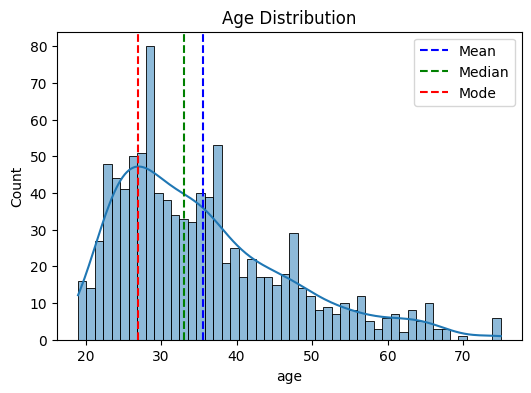

In [ ]:
# Membuat Histogram
fig,ax = plt.subplots(figsize=(6,4))
sns.histplot(df['age'], bins=50, kde=True)

# Menambahkan mean median dan Modus
mean_age = np.mean(df['age'])
median_age = np.median(df['age'])
mode_age = df['age'].mode()[0]
ax.axvline(mean_age, color='blue', linestyle='--', label='Mean')
ax.axvline(median_age, color='green', linestyle='--', label='Median')
ax.axvline(mode_age, color='red', linestyle='--', label='Mode')

ax.set_title('Age Distribution')
ax.legend()
plt.show()

Kurva tersebut condong positif (right skew) dan terdapat outliers pada data. Dibutuhkan metode statistika lebih lanjut untuk mencari outliers tersebut

### 2. Mencari Outlier

In [ ]:
df['age'].skew()

1.0207392686768317

Dari tes tersebut mengindikasikan bahwa distribusi cenderung banyak terdistribusi di kiri atau disebut *right skew*

<Axes: xlabel='age'>

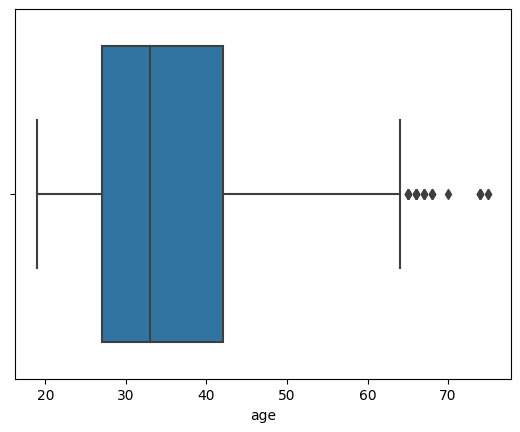

In [ ]:
# Membuat boxplot
sns.boxplot(x='age', data=df)

Terdapat outlier pada df['age']. Untuk menghilangkan outlier dapat digunakan Inter Quartile Range (IQR-Rule) untuk mencari outliers

In [ ]:
# Menghitung bawah dan batas atas
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Menghitung persentase outlier
outliers = df['age'][(df['age'] < lower_bound) | (df['age'] > upper_bound)]
percentage_outliers = len(outliers) / len(df) * 100
print('Percentage of outliers:', round(percentage_outliers, 2), '%')

Percentage of outliers: 2.3 %


Persentase outlier yang ditemukan berdasarkan tes yaitu **2.3%**

In [ ]:
# Menghitung central tendency dengan menghilangkan outliers 
mean_no_outliers = df['age'][(df['age'] >= lower_bound) & (df['age'] <= upper_bound)].mean()
median_no_outliers = df['age'][(df['age'] >= lower_bound) & (df['age'] <= upper_bound)].median()
mode_no_outliers = df['age'][(df['age'] >= lower_bound) & (df['age'] <= upper_bound)].mode()[0]

In [ ]:
# Menghitung central tendency dengan dan tanpa outlier
mean_with_outliers = df['age'].mean()
median_with_outliers = df['age'].median()
mode_with_outliers = df['age'].mode()[0]

print('Central Tendency (with outliers):')
print('Mean:', round(mean_with_outliers, 2))
print('Median:', median_with_outliers)
print('Mode:', mode_with_outliers)
print('\nCentral Tendency (without outliers):')
print('Mean:', round(mean_no_outliers, 2))
print('Median:', median_no_outliers)
print('Mode:', mode_no_outliers)

Central Tendency (with outliers):
Mean: 35.55
Median: 33.0
Mode: 27

Central Tendency (without outliers):
Mean: 34.77
Median: 33.0
Mode: 27


Dari hasil perhitungan diindikasikan bahwa data terdapat outlier dnegan persentase sekitar **2.3%**, namun berdasarkan perhitungan central tendency sebelum dan sedudah outlier dihilangkan, tidak ada perbedaan signifikan terhadap mean, medin, modus pada data, hanya mean yang bergeser dari **35.5** menjadi **34.77**

### 3. Menghitung Variance

In [ ]:
cleaned_data = df['age'][(df['age'] >= lower_bound) | (df['age'] <= upper_bound)]

In [ ]:
# Menghitung Range, Variance, dan standard deviation
range = cleaned_data.max() - cleaned_data.min()
variance = cleaned_data.var()
std = cleaned_data.std()

print("Range: ", range)
print("Variance: ", round(variance, 2))
print("Standard Deviation: ", round(std, 2))

Range:  56
Variance:  129.4
Standard Deviation:  11.38


Hasil penghitungan menunjukan range dari data sebesar 56, dengan variasi yang cenderung tinggi yaitu sekitar 129.4 dan standard deviasi yang juga cenderung tinggi

### 4. Mencari Korelasi

### 4.1. Mencari Korelasi antara 2 Numerikal Data — Pearson-Correlation 

In [ ]:
def calculate_pearson_correlation(df, column1, column2):
    """
    Menghitung koefisien Pearson-Correlation antara dua kolom numerikal data
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe.
    column1 : str
        Name of the first column.
    column2 : str
        Name of the second column.
    
    Returns:
    --------
    float
        Koefisien Pearson-Correlation antara dua kolom numerikal data.
    """
    x = df[column1]
    y = df[column2]
    correlation = np.corrcoef(x, y)[0, 1]
    return correlation

correlation_age_amount = calculate_pearson_correlation(df, 'age', 'credit_amount')
correlation_age_amount

0.032716416665448084

*Pearson-Correlation* antara kolom **'age'** dan **'credit_amount'** yaitu **0.032716416665448084** yang berarti umur dan jumlah kredit kurang mempunyai relasi atau independen satu sama lain

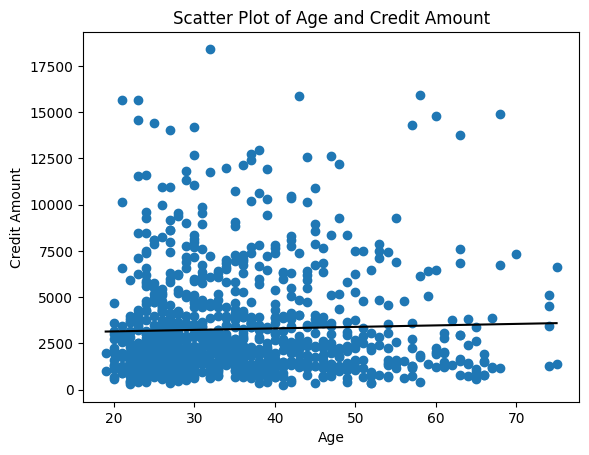

In [ ]:
age = df['age']
credit_amount = df['credit_amount']

# Calculate linear regression line
slope, intercept = np.polyfit(age, credit_amount, 1)
x_line = np.arange(age.min(), age.max() + 1)
y_line = slope * x_line + intercept

# Create scatter plot and plot linear regression line
plt.scatter(age, credit_amount)
plt.plot(x_line, y_line, color='black')

plt.xlabel('Age')
plt.ylabel('Credit Amount')
plt.title('Scatter Plot of Age and Credit Amount')

plt.show()

Hasil analisis menggunakan scatter plot menunjukkan adanya garis regresi yang cenderung mendatar, menunjukkan bahwa umur tidak memiliki pengaruh linier yang signifikan terhadap jumlah kredit yang dimiliki. Dengan kata lain, tidak terdapat korelasi linier yang signifikan antara umur dan jumlah kredit dalam data tersebut.

Namun demikian, perlu diperhatikan bahwa masih terdapat kemungkinan bahwa umur dan jumlah kredit memiliki hubungan nonlinear atau hubungan yang tidak dapat ditunjukkan oleh scatter plot. Oleh karena itu, perhitungan statistik yang lebih mendetail perlu dilakukan untuk mengevaluasi hubungan antara kedua variabel tersebut.

### 4.2. Mencari Korelasi antara 2 Kategorikal Data — Chi-Squared Test 

In [ ]:
from scipy.stats import chi2_contingency

cols = ['credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 
        'age', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']

# Calculate the chi-square statistic and p-value for each column
for col in cols:
    contingency_table = pd.crosstab(df[col], df['class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: chi-square={chi2:.2f}, p-value={p:.12f}")

credit_history: chi-square=61.69, p-value=0.000000000001
purpose: chi-square=33.36, p-value=0.000115749101
savings_status: chi-square=36.10, p-value=0.000000276121
employment: chi-square=18.37, p-value=0.001045452349
personal_status: chi-square=9.61, p-value=0.022238005469
age: chi-square=57.48, p-value=0.279542059004
housing: chi-square=18.20, p-value=0.000111674654
existing_credits: chi-square=2.67, p-value=0.445144080008
job: chi-square=1.89, p-value=0.596581591884
num_dependents: chi-square=0.00, p-value=1.000000000000
own_telephone: chi-square=1.17, p-value=0.278876154304
foreign_worker: chi-square=5.82, p-value=0.015830754903


1. Dari hasil Chi-Square tes, kita dapat melihat beberapa vaiabel yang mempunyai keterkaitan signifikan dengan class credit, yang terindikasi dari p-value yang rendah (kurang dari 0.05).

  Berikut variabel-variabel yang mempunyai korelasi significant dengan kelas kredit berdasarkan perhitungan Chi-Square tes:
- credit_history
- purpose
- savings_status
- employment
- personal_status
- housing
- foreign_worker

  Variabel-variabel berikut dapat mempunyai kemungkinan sebagai predictor penting terhadap kelas kredit.

2. Lain halnya dengan variabel dengan p-value tinggi (>0.05) yang berarti tidak mempunyai asosiasi signifikan dengan class, yang berarti variabel-variabel tersebut mempunyai kemungkinan bukan sebagai prediktor terhadap class. Variabel-variabelnya sebagai berikut:

- age
- existing_credits
- job
- num_dependents
- own_telephone

Untuk membuktikan keterkaitan antara variabel-variabel tersebut dadapat dilakukan analisis statistik lebih lanjut menggunakan statistika Inferensial

## Ch. IV.C — Statistik Inferensial

Dari perhitungan sebelumnya ada beberapa variabel yang mempunyai hubungan satu sama lain contohnya seperti credit_history yang mempunyai asosiasi kuat dengan class kredit. Selain itu ada juga variabel yang ternyata kurang memiliki relasi satu sma lain seperti antara umur dan jumlah kredit. Untuk membuktikan hal itu saya akan mencoba membuktikan relasi antara variabel-variabel tersebut dengan menggunakan statistika inferensial

### 1. Membuktikan Korelasi Antara Variabel Age-Credit Amount (Numerikal Data)

1.1. Mencari confidence interval 

In [ ]:
import pandas as pd
import scipy.stats as stats

r = df['age'].corr(df['credit_amount'])
n = len(df)

se = 1 / (n - 2) * (1 - r ** 2) ** 0.5
z = stats.norm.ppf(0.975)  # 95% confidence interval

ci = (r - z * se, r + z * se)

print(f"Correlation coefficient: {r:.2f}")
print(f"Confidence interval: {ci}")

Correlation coefficient: 0.03
Confidence interval: (0.030753576218216276, 0.03467925711267989)


1.2. Hypothesis Testing

In [ ]:
t = r / se
p = stats.t.sf(abs(t), n - 2) * 2  # two-tailed test

# Mendefinisikan Null dan Alternatif Hypothesis
H0= 'Tidak ada korelasi significant amtara age and credit amount'
H1= 'Ada korelasi significant amtara age and credit amount.'

alpha = 0.05  # significance level
if p < alpha:
    print("Reject null hypothesis:", H1)
else:
    print("Fail to reject null hypothesis:", H0)

print(f"T-statistic: {t:.2f}")
print(f"P-value: {p:.6f}")

Reject null hypothesis: Ada korelasi significant amtara age and credit amount.
T-statistic: 32.67
P-value: 0.000000


### 2. Membuktikan Korelasi Antara Variabel-Variabel Kategorikal dengan Class Credit 

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import norm

def categorical_association(df, col1, col2, conf_level=0.95):
    """
    Menghitung korelasi antara dua kolom kategorikal menggunakan Chi-Squared tes
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe.
    col1 : str
        Name of the first column.
    col2 : str
        Name of the second column.
    conf_level : float
        Confidence level (default: 0.95).
    
    Returns:
    --------
    Chi-Squared Statistic: float
    P-value: float
    Degrees of Freedom: int
    Expected Frequencies: numpy.ndarray
    Hypothesis Testing Result: str
    """    
    # Membuat contingency table dari dua variabel
    cont_table = pd.crosstab(df[col1], df[col2])

    # Melakukan Chi-Squared tes
    stat, p_value, dof, expected = chi2_contingency(cont_table)

    # Interpretasi hasil
    alpha = 1 - conf_level
    if p_value < alpha:
        hyp = "Reject the null hypothesis. There is a significant association between {} and {}.".format(col1, col2)
    else:
        hyp = "Fail to reject the null hypothesis. There is no significant association between {} and {}.".format(col1, col2)

    # Menghitung Confidence Interval
    n = cont_table.to_numpy().sum()
    phi = np.sqrt(stat/n)
    z = norm.ppf(1 - alpha/2)
    lower = phi - z*np.sqrt(phi*(1-phi)/n)
    upper = phi + z*np.sqrt(phi*(1-phi)/n)
    ci = (lower, upper)

    # Print hasil
    print("Chi-Squared Statistic:", stat)
    print("P-value:", p_value)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:\n", expected)
    print(hyp)
    print("Confidence Interval: ({:.4f}, {:.4f})".format(ci[0], ci[1]))
    print()

# Pemanggilan fungsi
cols = ['credit_history', 'purpose', 'savings_status', 'employment', 
        'personal_status', 'housing', 'existing_credits', 'job', 
        'num_dependents', 'foreign_worker']

for col in cols:
    categorical_association(df, col, 'class', 0.95)

Chi-Squared Statistic: 61.691396964595505
P-value: 1.2791872956750962e-12
Degrees of Freedom: 4
Expected Frequencies:
 [[ 14.7  34.3]
 [ 87.9 205.1]
 [ 26.4  61.6]
 [159.  371. ]
 [ 12.   28. ]]
Reject the null hypothesis. There is a significant association between credit_history and class.
Confidence Interval: (0.2216, 0.2752)

Chi-Squared Statistic: 33.35644686141815
P-value: 0.00011574910079691586
Degrees of Freedom: 9
Expected Frequencies:
 [[ 29.1  67.9]
 [  3.6   8.4]
 [ 15.   35. ]
 [ 54.3 126.7]
 [ 70.2 163.8]
 [  3.6   8.4]
 [ 84.  196. ]
 [  6.6  15.4]
 [  2.7   6.3]
 [ 30.9  72.1]]
Reject the null hypothesis. There is a significant association between purpose and class.
Confidence Interval: (0.1587, 0.2066)

Chi-Squared Statistic: 36.098928192418704
P-value: 2.761214238568249e-07
Degrees of Freedom: 4
Expected Frequencies:
 [[ 30.9  72.1]
 [ 18.9  44.1]
 [180.9 422.1]
 [ 14.4  33.6]
 [ 54.9 128.1]]
Reject the null hypothesis. There is a significant association between saving

Berdasarkan hasil perhitungan, dapat disimpulkan sebagai berikut:

1. Credit_history, purpose, savings_status, employment, personal_status, housing, dan foreign_worker berhubungan secara signifikan dengan variabel class.

2. Existing_credits, job, dan num_dependents tidak berhubungan secara signifikan dengan variabel class.

# Ch. V — Pengambilan Kesimpulan

### 1. Mendefiniskan Profil Risiko Peminjam

Dari data-data tersebut, kita dapat mendefinisikan profil risiko peminjam berdasarkan faktor-faktor yang ada dan menentukan kelas risiko yang sesuai untuk setiap peminjam.

Untuk melakukan hal tersebut, kelas risiko dapat dibagi menjadi empat kategori, yaitu kelas A dengan tingkat risiko gagal bayar rendah, kelas B dengan tingkat risiko gagal bayar sedang, kelas C dengan tingkat risiko gagal bayar tinggi, dan kelas D dengan tingkat risiko gagal bayar sangat tinggi. Berikut adalah detailnya:

**1. Kelas A (Low Risk)**
* Credit Hisotry = "All Paid", 
* Saving Status = "500-1000 atau Lebih dari 1000"
* Employment Year= "4-7 atau Lebih dari 7"
* Personal Status = "Female Divorce/Dependent/Mariaged atau Male Single"
* Housing = "Own"
* Foreign Worker = "No"
* Class =  "Good"

**2. Kelas B (Medium Risk)**
* Credit Hisotry = "No Credits/All paid atau Existing Paid", 
* Saving Status = " 100-500 atau 500-1000"
* Employment Year= "1-4 atau 4-7"
* Personal Status = "Male Marriaged/Widowed or Male Divorced/Separated atau Female Divorce/Dependent/Mariaged"
* Housing = "Own or Rent"
* Foreign Worker = "Yes"
* Class =  "Bad or Good"

**3. Kelas C (High Risk Profile)**
* Credit Hisotry = "Existing Paid atau Delayed Previously", 
* Saving Status = "Less than 100 atau 100-500"
* Employment Year= "Unemployed or Less than 1"
* Personal Status = "Male Marriaged/Widowed or Male Divorced/Separated atau Female Divorce/Dependent/Mariaged"
* Housing = "For Fre or Rent"
* Foreign Worker = "Yes"
* Class =  "Bad or Good"

**4. Kelas D (Very High Risk Profile/Could not Approved)**
* Credit Hisotry = "Critical/Other Existing Credit", 
* Saving Status = "No Known Savings atau Less than 100"
* Employment Year= "Unemployed"
* Personal Status = "Male Marriaged/Widowed"
* Housing = "For Free"
* Foreign Worker = "Yes"
* Class =  "Bad"

In [ ]:
import pandas as pd

def assign_class_type(row):
    """
    Fungsi untuk menambahkan tipe kelas berdasarkan kriteria yang tersedia
    
    Parameters:
    -----------
    row : pandas Series
        A row of a pandas DataFrame
    
    Returns:
    --------
    str
        A class type based on the criteria
    """
    if (row['credit_history'] == 'all paid') & ((row['savings_status'] == '500<=X<1000') | (row['savings_status'] == '>=1000')) & (row['employment'] == '>=7') & ((row['personal_status'] == 'female div/dep/mar') | (row['personal_status'] == 'male single'))& (row['housing'] == 'own') & (row['foreign_worker'] == False) & (row['class'] == 'good'):
        return 'A'
    elif ((row['credit_history'] == 'no credits/all paid') | (row['credit_history'] == 'existing paid')) & ((row['savings_status'] == '500<=X<1000') | (row['savings_status'] == '500<=X<1000')) & ((row['employment'] == '1<=X<4') | (row['employment'] == '4<=X<7')) & ((row['personal_status'] == 'male mar/wid') | (row['personal_status'] == 'female div/dep/mar') | (row['personal_status'] == 'male div/sep')) & ((row['housing'] == 'own') | (row['housing'] == 'rent')) & ((row['foreign_worker'] == False) | (row['foreign_worker'] == True)) & ((row['class'] == 'bad') | (row['class'] == 'good')):
        return 'B'
    elif ((row['credit_history'] == 'delayed previously') | (row['credit_history'] == 'existing paid')) & ((row['savings_status'] == '<100') | (row['savings_status'] == '100<=X<500')) & ((row['employment'] == 'unemployed') | (row['employment'] == '<1')) & ((row['personal_status'] == 'male mar/wid') | (row['personal_status'] == 'female div/dep/mar') | (row['personal_status'] == 'male div/sep')) & ((row['housing'] == 'own') | (row['housing'] == 'rent')) & ((row['foreign_worker'] == False) | (row['foreign_worker'] == True)) & ((row['class'] == 'bad') | (row['class'] == 'good')):
        return 'C'
    elif ((row['credit_history'] == 'critical/other existing credit') & ((row['savings_status'] == '<100') | (row['savings_status'] == 'no known savings'))) & (row['employment'] == 'unemployed') & (row['personal_status'] == 'male mar/wid') & (row['housing'] == 'for free') & (row['foreign_worker'] == True) & (row['class'] == 'Bad'):
        return 'D'
    else:
        return 'Not Classified/Manually Checked'

df['class_type'] = df.apply(assign_class_type, axis=1)

In [ ]:
# Menghitung total masing-masing kelas kategori
class_type_counts = df['class_type'].value_counts()
print('Class A:', class_type_counts.get('A', 0))
print('Class B:', class_type_counts.get('B', 0))
print('Class C:', class_type_counts.get('C', 0))
print('Class D:', class_type_counts.get('D', 0))
print('Not Classified/Manually Checked:', class_type_counts.get('Not Classified/Manually Checked', 0))

Class A: 0
Class B: 10
Class C: 89
Class D: 0
Not Classified/Manually Checked: 901


Dari hasil perhitungan berdasarkan katagori kelas yang ada, didapatkan hasil sebagai berikut:

* Class A: 0
* Class B: 10
* Class C: 89
* Class D: 0
* Tidak terklasifikasi/Dilakukan pengecekan manual: 901

Dapat dilihat bahwa kelas A dan D **tidak memiliki nasabah** yang memenuhi kriteria yang telah didefinisikan, sedangkan untuk kelas B terdapat **10 pelanggan** yang memenuhi kriteria, diikuti oleh kelas C dengan total **89 orang**.

Populasi terbesar masih didominasi oleh data yang perlu dilakukan pengecekan manual atau tidak terklasifikasi. Hal ini kemungkinan disebabkan oleh kurangnya representasi data terhadap keseluruhan populasi atau adanya bias dalam data tersebut.

Untuk mengecek hal tersebut, perlu dilakukan pemodelan lebih lanjut seperti menggunakan *linear regression* atau *K-means clustering*. 

### 2. Kesimpulan Berdasarkan Data

Dari data di atas, dapat disimpulkan bahwa terdapat banyak faktor yang mempengaruhi kategori kredit seseorang, seperti Riwayat Kredit, Tujuan Kredit, Status Tabungan, Lama Bekerja, Status Personal, dan Jenis Tempat Tinggal. Dengan hasil perhitungan tersebut, lembaga keuangan dapat melakukan filter yang lebih mendalam berdasarkan kategori-kategori tersebut. Meskipun masih terdapat keterbatasan dalam jumlah dan jenis data, hasil tersebut dapat digunakan untuk menentukan visibilitas pelanggan berdasarkan kategori-kategori yang ada.

Selain itu, lembaga keuangan dapat memberikan batas pinjaman yang sesuai dengan kelas risiko dan melakukan proses pengecekan secara lebih detail terhadap nasabah. Hal ini meliputi melakukan survei lokasi tempat tinggal, memeriksa transaksi lewat rekening koran nasabah dalam rentang waktu tertentu, serta memastikan riwayat kredit nasabah sebelumnya melalui BI Checking. Dengan melakukan hal tersebut, diharapkan dapat meminimalkan risiko gagal bayar terhadap nasabah tersebut.

# Additional — Dashboard

Agar dapat lebih memahami keseruhan data secara visual, tersedia dashboard dengan link sebagai berikut [LookerStudio](https://lookerstudio.google.com/reporting/261a1277-43d5-4952-b4bd-8c450177b5fe)